In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance


In [10]:
#Definición de clases
class Objeto:
    def __init__(self, nombre, cantidad):
        self.nombre = nombre
        self.cantidad = cantidad
    
    def getNombre(self):
        return self.nombre
    
    def getCantidad(self):
        return self.cantidad
    
class Estanteria:
    def __init__(self, nombre):
        self.nombre = nombre
        self.objetos = []
        
    def addObjeto(self, objeto):
        self.objetos.append(objeto)
    
    def getObjetos(self):
        return self.objetos

class Posicion:
    def __init__(self, nombre, x, y):
        self.nombre = nombre
        self.x = x
        self.y = y
        self.estanterias = []
        self.vecinos = []
        
    def __str_(self):
        return self.nombre
        
    def getNombre(self):
        return self.nombre
    
    def addEstanteria(self, estanteria):
        self.estanterias.append(estanteria)
        
    def getEstanterias(self):
        return self.estanterias
    
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def addVecino(self, vecino):
        self.vecinos.append(vecino)
    
    def getVecinos(self):
        return self.vecinos

class Pedido:
    def __init__(self):
        self.lista = []
    
    def addLineaPedido(self, objeto):
        self.lista.append(objeto)
        
    def getLineasPedido(self):
        return self.lista
    
class Node:
    def __init__(self, name, pointer, state):
        self.name = name
        self.pointer = pointer
        self.state = state
        self.H = 0
        self.G = 0
        self._id = 0
        
    def __repr_(self):
        return self.name
    
    def getName(self):
        return self.name
    
    def getPointer(self):
        return self.pointer
    
    def getState(self):
        return self.state
    
    def getH(self):
        return self.H
    def getG(self):
        return self.G
    def getF(self):
        return (self.G + self.H)
    
    def setH(self, H):
        self.H = H
    def setG(self, G):
        self.G = G
        
    def getId(self):
        return self._id
    def setId(self, _id):
        self._id= _id
 

In [80]:
#Base de datos
almacen = []

pos = Posicion("ps1", 10, 10)
pos.addVecino("pc1")
est = Estanteria ("s1")
est.addObjeto(Objeto ("patatas", 200))
est.addObjeto(Objeto ("melones", 100))
pos.addEstanteria(est)
almacen.append(pos)

pos = Posicion("ps2", 20, 10)
pos.addVecino("pc2")
est = Estanteria ("s2")
est.addObjeto(Objeto ("boligrafos", 500))
pos.addEstanteria(est)
almacen.append(pos)

pos = Posicion("ps3", 30, 10)
pos.addVecino("pc3")
est = Estanteria ("s3")
est.addObjeto(Objeto ("boligrafos", 400))
est.addObjeto(Objeto ("colonias", 150))
pos.addEstanteria(est)
almacen.append(pos)

pos = Posicion("ps4", 40, 10)
pos.addVecino("pc4")
est = Estanteria ("s4")
est.addObjeto(Objeto ("melocotones", 200))
est.addObjeto(Objeto ("berzas", 100))
est.addObjeto(Objeto ("ratones", 210))
pos.addEstanteria(est)
almacen.append(pos)

pos = Posicion("ps5", 10, 0)
pos.addVecino("pc1")
est = Estanteria ("s5")
est.addObjeto(Objeto ("papeles", 500))
pos.addEstanteria(est)
almacen.append(pos)

pos = Posicion("ps6", 20, 0)
pos.addVecino("pc2")
est = Estanteria ("s6")
est.addObjeto(Objeto ("boligrafos", 400))
pos.addEstanteria(est)
almacen.append(pos)

pos = Posicion("ps7", 30, 0)
pos.addVecino("pc3")
est = Estanteria ("s7")
est.addObjeto(Objeto ("plumas", 500))
pos.addEstanteria(est)
almacen.append(pos)

pos = Posicion("ps8", 40, 0)
pos.addVecino("pc4")
est = Estanteria ("s8")
est.addObjeto(Objeto ("plumas", 400))
est.addObjeto(Objeto ("patatas", 400))
pos.addEstanteria(est)
almacen.append(pos)

pos = Posicion("ps", 0, 5)
pos.addVecino("pc1")
almacen.append(pos)

pos = Posicion("pc1", 10, 5)
pos.addVecino("ps1")
pos.addVecino("ps")
pos.addVecino("ps5")
pos.addVecino("pc2")
almacen.append(pos)

pos = Posicion("pc2", 20, 5)
pos.addVecino("ps2")
pos.addVecino("pc1")
pos.addVecino("ps6")
pos.addVecino("pc3")
almacen.append(pos)

pos = Posicion("pc3", 30, 5)
pos.addVecino("ps3")
pos.addVecino("pc2")
pos.addVecino("ps7")
pos.addVecino("pc4")
almacen.append(pos)

pos = Posicion("pc4", 40, 5)
pos.addVecino("ps4")
pos.addVecino("pc3")
pos.addVecino("ps8")
pos.addVecino("pt")
almacen.append(pos)

pos = Posicion("pt", 50, 5)
pos.addVecino("pc4")
almacen.append(pos)



#Mapa
mapa=nx.DiGraph()

mapa.add_node('ps')
mapa.add_node('pc1')
mapa.add_node('pc2')
mapa.add_node('pc3')
mapa.add_node('pc4')
mapa.add_node('pt')
mapa.add_node('ps1')
mapa.add_node('ps2')
mapa.add_node('ps3')
mapa.add_node('ps4')
mapa.add_node('ps5')
mapa.add_node('ps6')
mapa.add_node('ps7')
mapa.add_node('ps8')

mapa.add_edge('ps', 'pc1')

mapa.add_edge('pc1', 'ps1')
mapa.add_edge('pc1', 'ps5')
mapa.add_edge('pc1', 'pc2')
mapa.add_edge('pc1', 'ps')

mapa.add_edge('pc2', 'ps2')
mapa.add_edge('pc2', 'ps6')
mapa.add_edge('pc2', 'pc3')
mapa.add_edge('pc2', 'pc1')

mapa.add_edge('pc3', 'ps3')
mapa.add_edge('pc3', 'ps7')
mapa.add_edge('pc3', 'pc4')
mapa.add_edge('pc3', 'pc2')

mapa.add_edge('pc4', 'ps4')
mapa.add_edge('pc4', 'ps8')
mapa.add_edge('pc4', 'pt')
mapa.add_edge('pc4', 'pc3')

mapa.add_edge('pt', 'pc4')

mapa.add_edge('ps1', 'pc1')
mapa.add_edge('ps2', 'pc2')
mapa.add_edge('ps3', 'pc3')
mapa.add_edge('ps4', 'pc4')
mapa.add_edge('ps5', 'pc1')
mapa.add_edge('ps6', 'pc2')
mapa.add_edge('ps7', 'pc3')
mapa.add_edge('ps8', 'pc4')

mapa.node['ps']['pos'] = ( 0, 5)

mapa.node['ps1']['pos'] = (10, 10)
mapa.node['ps2']['pos'] = (20, 10)
mapa.node['ps3']['pos'] = (30, 10)
mapa.node['ps4']['pos'] = ( 40, 10)
mapa.node['ps5']['pos'] = (10, 0)
mapa.node['ps6']['pos'] = (20, 0)
mapa.node['ps7']['pos'] = (30, 0)
mapa.node['ps8']['pos'] = (40, 0)

mapa.node['pt']['pos'] = (50, 5)
mapa.node['pc1']['pos'] = (10, 5)
mapa.node['pc2']['pos'] = (20, 5)
mapa.node['pc3']['pos'] = (30, 5)
mapa.node['pc4']['pos'] = (40, 5)


In [97]:
class Utils:
    def getPosition(position):
        for i in range(0, len(almacen)):
            if (almacen[i].getNombre() == position):
                return almacen[i]
        
    def getCoordinates(position):
        pos = Utils.getPosition(position)
        return (pos.getX(), pos.getY())
    
    def posicionesDelObjeto(objeto):
        posiciones = []
        for i in range(0,len(almacen)):
            pos = almacen[i]
            for j in range(0, len(pos.getEstanterias())):
                estanteria = pos.getEstanterias()[j]
                for k in range(0, len(estanteria.getObjetos())):
                    obj = estanteria.getObjetos()[k]
                    if (obj.getNombre() == objeto.getNombre()  and obj.getCantidad() >= objeto.getCantidad()):
                        posiciones.append(pos.getNombre())
                        break
                        
        return posiciones
        
    def posicionesDelPedido(pedido):
        posiciones = []
        for i in range(0, len(pedido.getLineasPedido())):
            lineaPedido = pedido.getLineasPedido()[i]
            posiciones.append(Utils.posicionesDelObjeto(lineaPedido))
            
        return posiciones
    
    def calculateH(inicio,fin):
        a = np.array(Utils.getCoordinates(inicio))
        b = np.array(Utils.getCoordinates(fin))

        dist = np.linalg.norm(a-b)
        return dist

    def calculateG(inicio,fin):
        a = np.array(Utils.getCoordinates(inicio))
        b = np.array(Utils.getCoordinates(fin))

        dist = distance.cityblock(a,b)
        if (inicio.startswith('ps') and fin.startswith('ps')):
            if (Utils.getCoordinates(inicio)[1] == Utils.getCoordinates(fin)[1]):
                dist = dist + 10
        return dist
    
    def aEstrella(inicio, final):
        contador = 1
        
        #Crear grafo de exploración y lista de ABIERTOS
        G = nx.DiGraph()
        s = inicio
        s.setId(s.getName())
        G.add_node(s.getName())
        ABIERTOS = [s]
        #Crear lista CERRADOS inicialmente vacía
        CERRADOS = []
        while (len(ABIERTOS) > 0):
            n = ABIERTOS.pop(0)
            CERRADOS.append(n)
            #Si n es nodo objetivo se acaba
            if (n.getName() == final.getName() and np.array_equal(n.getState(), final.getState())):
#                 camino = [n.getId()]
#                 aux = n
#                 while (aux.getPointer() != None):
#                     camino.append(aux.getPointer().getId())
#                     aux = aux.getPointer();
#                 Utils.printGraph(G, camino)
                return n
        
            #Expandir en nodo n            
            nextState = n.getState()[:]
            rowsToRemove = []
            
            for i in range(0, len(nextState)):
                for j in range(0, len(nextState[i])):
                    if (nextState[i][j] == n.getName()):
                        rowsToRemove.append(i)
                        break
            for i in range(len(rowsToRemove)-1, -1, -1):
                nextState.remove(nextState[rowsToRemove[i]])
                
            M = []            
            for vecino in Utils.getPosition(n.getName()).getVecinos():
                M.append(Node(vecino, n, nextState))
                
            #Establecer apuntadores que no estuviesen ni en abiertos ni en cerrados
            for i in range(0, len(M)):
                M[i].setH(Utils.calculateH(M[i].getName(), final.getName()))
                M[i].setG(M[i].getPointer().getG() + Utils.calculateG(M[i].getPointer().getName(), M[i].getName()))
                
                ABIERTOS.append(M[i])
                if (n.getName() == inicio):
                    source = n.getId()
                else:
                    source = n.getId()
                    contador = contador + 1
                end = "{name} ({num})".format(name=M[i].getName(), num=contador)
                M[i].setId(end)
                contador = contador + 1
                G.add_edge(source, end)
            #################################################
            #if (n.getPointer() != None):
                #print ("Nodo: {nodo} Fila: {fila} Padre:{padre}\n".format(nodo=n.getName(), fila=n.getRow(), padre=n.getPointer().getName()))
            #else:
                #print ("Trabajo con {nodo} y padre {padre}\n".format(nodo=n.getName(), padre=-1))
            
            #################################################
            #Reordenar ABIERTOS en función de F    
            ABIERTOS = sorted(ABIERTOS, key=lambda node: node.getF())
            #print(ABIERTOS)
            #print ("**************************ABIERTOS")
            #print(CERRADOS)
            #print ("**************************CERRADOS")
            
        #Salida con fallo    
        return "FALLO"
        
    def printGraph(G, camino):
        
        pos = nx.shell_layout(G)
        nx.draw_networkx(G,pos=pos, node_color='b', alpha=0.5)
        nx.draw_networkx_labels(G,pos, alpha=1.0)

        path_edges = list(zip(camino,camino[1:]))

        nx.draw_networkx_nodes(G,pos,nodelist=camino,node_color='r', alpha=0.5)
        nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='r')


        plt.axis('equal')
        fig = plt.gcf()
        fig.set_size_inches(20, 20)
        fig.savefig('test3png.png', dpi=100)
        
        plt.title("Grafo de posibles posiciones a visitar para completar el pedido")
        plt.show()
        
    def printMapa(G, camino):
        
        node_pos=nx.get_node_attributes(G,'pos')
        nx.draw_networkx(G,pos=node_pos, node_size=750,font_color='w' ,node_color='k')

        path_edges = list(zip(camino,camino[1:]))

        nx.draw_networkx_nodes(G,node_pos,nodelist=camino,node_color='r', node_size=750)
        nx.draw_networkx_edges(G,node_pos,edgelist=path_edges,edge_color='r')

        plt.axis('off')
        fig = plt.gcf()
        fig.set_size_inches(15, 7)
        #fig.savefig('test3png.png', dpi=100)

        plt.show()
      

Position to visit: ['ps', 'pc1', 'pc2', 'pc3', 'ps3', 'pc3', 'pc4', 'ps8', 'pc4', 'pt']
Distancia recorrida: 70


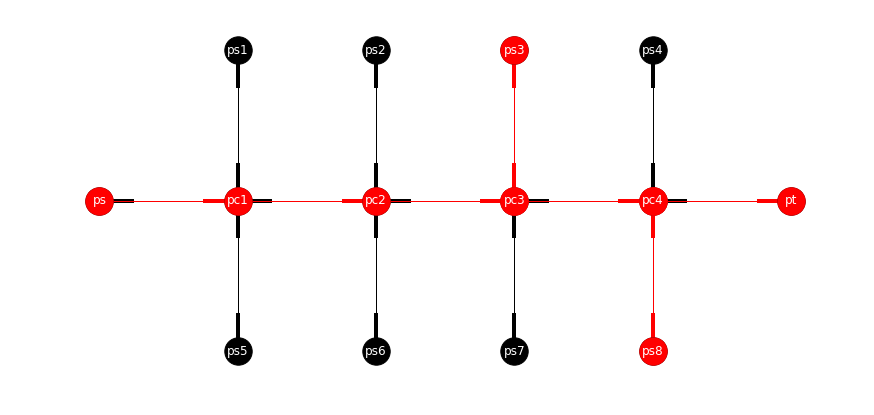

In [102]:
pedido = Pedido()
pedido.addLineaPedido(Objeto("patatas", 40))
pedido.addLineaPedido(Objeto("boligrafos", 40))
pedido.addLineaPedido(Objeto("plumas", 40))

inicio = 'ps'
fin = 'pt'

posiciones = Utils.posicionesDelPedido(pedido)
# print(posiciones)
n = Utils.aEstrella(Node(inicio, None, posiciones), Node(fin, None, []))
distancia = n.getG()

ruta = [n.getName()]
while (n.getPointer() != None):
    ruta.append(n.getPointer().getName())
    n = n.getPointer()
    
ruta = list(reversed(ruta))
print("Position to visit: " + str(ruta))
print("Distancia recorrida: " + str(distancia))

Utils.printMapa(mapa, ruta)
